In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [3]:
df = pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')


In [4]:
snames = sorted(df['Startup Name'].unique().tolist())
df['Investors Name']= df['Investors Name'].fillna('Undisclosed')

In [5]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
df.columns  

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

### we will remove the data which is mostly none , We can remove 10%`of total data which may not be use full like remarks column

In [8]:
df.drop(columns=['Remarks'],inplace=True)

In [9]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

## Set serial no as index

In [10]:
df.set_index('Sr No',inplace=True)

## Rename columns to more meaningfull name 

In [11]:
df.rename(columns={
    'Date dd/mm/yyyy':'date', 'Startup Name':'startup', 'Industry Vertical':'vertical',
    'SubVertical':'subvertical', 'City  Location':'city', 'Investors Name':'investors',
    'InvestmentnType':'round','Amount in USD':'amount'
},inplace=True)

In [12]:
df.columns

Index(['date', 'startup', 'vertical', 'subvertical', 'city', 'investors',
       'round', 'amount'],
      dtype='object')

## Converting amount to crore ruppees

In [13]:
df['amount'] = df['amount'].fillna('0')

In [14]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [15]:
df = df[df['amount'].str.isdigit()]


In [16]:
df['amount'] = df['amount'].astype('float')


In [17]:
def to_inr(dollar):
    inr = dollar* 8.5 
    return inr/10000000

In [18]:
df['amount'] = df['amount'].apply(to_inr)

In [19]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')
df['date'] = df['date'].str.replace('15-01-07 00:00:00','15/01/07')
df['date'] = df['date'].str.replace('01/07/015','01/07/2015')
df['date'] = df['date'].str.replace('12/05.2015','12/05/2015')
df['date'] = df['date'].str.replace('.','/')
df['date'] = df['date'].str.replace('//','/')

In [20]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True,)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3029 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3029 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [23]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [24]:
df

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,170.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,6.841135
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,15.605031
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,2.550000
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.530000
...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,2.975000
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,0.340000


In [25]:
df.to_csv('cleaned_startup_data.csv',index=False)

# Other functions for project 

In [26]:
investors = set(df['investors'].str.split(',').sum())

In [27]:
# Load the recent 5 investments of the investor
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,3.052669
259,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,18.700000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,4.675000
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,2.295000
528,2017-10-05,Little Black Book,Consumer Internet,New Delhi,Private Equity,0.850000


In [28]:
# Biggest investment
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending = False)

startup
Lenskart                 51.000000
CureFit                  21.250000
Bizongo                  18.700000
Curefit                  12.750000
Xpressbees               10.625000
FirstCry.com              8.500000
POPxo                     7.310000
\\xc2\\xa0CloudCherry     5.100000
Sigtuple                  4.930000
RentMojo                  4.250000
Aasaanjobs                4.250000
PlaySimple                3.400000
Tripoto                   3.052669
Active.ai                 2.550000
Heckyl                    2.295000
Little Black Book         0.850000
Cloudcherry Analytics     0.850000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

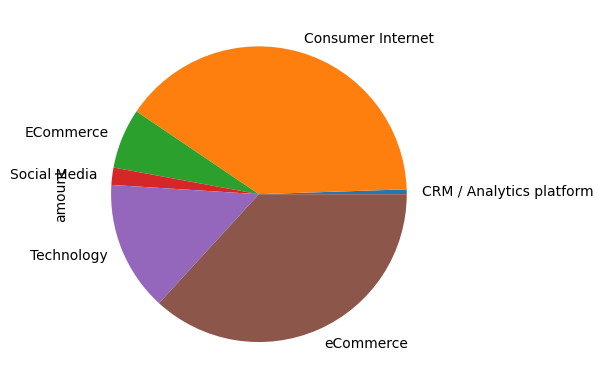

In [29]:
# Most invested Sector
df[df['investors'].str.contains(' IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind= 'pie')

<Axes: ylabel='amount'>

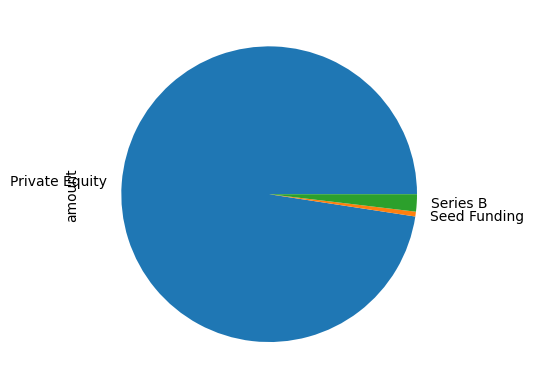

In [30]:
# stage
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

In [31]:
# year on year investment graph 
df['year'] = df['date'].dt.year


<Axes: xlabel='year'>

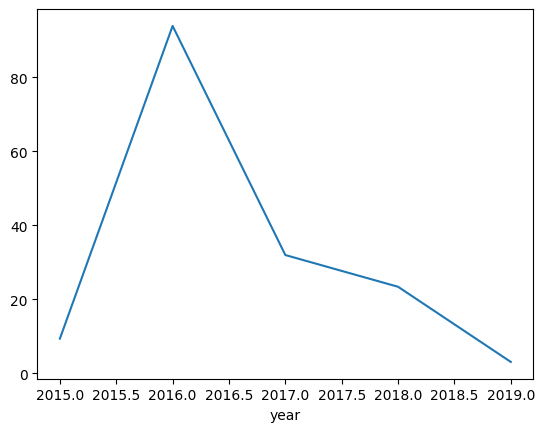

In [32]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

# Over all analysis

In [34]:
round(df['amount'].sum())

31079

In [48]:
# maximum
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

3315.0

In [49]:
df.groupby('startup')['amount'].sum().mean()

13.401752981069427

In [51]:
#total dunded startups
# data is unclean so this might be not accurate number
df['startup'].nunique()

2319

In [52]:
# month on month analysis
df['month'] = df['date'].dt.month

In [68]:
# month on month  analysis by amount
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

#momo by count
df.groupby(['year','month'])['amount'].count().reset_index()


,year,month,amount
0,2015,4,63
1,2015,5,57
2,2015,6,85
3,2015,7,86
4,2015,8,98
5,2015,9,88
6,2015,10,93
7,2015,11,92
8,2015,12,89
9,2016,1,104


In [65]:
temp_df['x-axis']=temp_df['month'].astype('str')+'-'+ temp_df['year'].astype('str')

In [66]:
temp_df[['amount','x-axis']]

,amount,x-axis
0,833.850000,4-2015
1,273.814750,5-2015
2,443.694900,6-2015
3,1283.348700,7-2015
4,904.243600,8-2015
5,1249.942000,9-2015
6,216.716850,10-2015
7,764.383750,11-2015
8,259.975050,12-2015
9,594.898000,1-2016
